<a href="https://colab.research.google.com/github/Thezone-1/Number_Recognizer/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Handwritten digits : Multiclass Classification



In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# Data Ingestion

In [ ]:
data = pd.read_csv('sample_data/mnist_train_small.csv')
cols = [x for x in range(784) ]
cols.insert(0,'label')
data.columns = cols

In [ ]:
data.head()

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Lets Plot some images

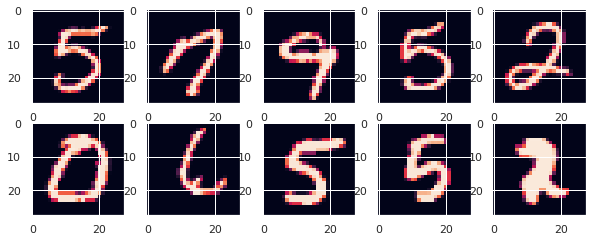

In [ ]:
plt.figure(figsize=(10,10))
for i,digits in zip(range(10),data.values[:10]):
  digits = digits[1:]
  plt.subplot(5,5,i+1)
  plt.imshow(digits.reshape(28,28))

In [ ]:
data.values[6][0]

6

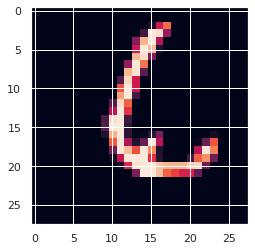

In [ ]:
plt.imshow(data.values[6][1:].reshape(28,28))

# EDA : Exploratory Data Analysis

In [ ]:
print(data.shape)

(19999, 785)


In [ ]:
data.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
count,19999.000000,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,...,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.0,19999.0,19999.0,19999.0
mean,4.470124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215011,0.087704,0.036502,0.013651,0.032602,0.006000,0.0,0.0,0.0,0.0
std,2.892807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.314821,3.921664,2.712527,0.950818,2.718102,0.600333,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
10%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
90%,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


# Data Cleaning:

## Checking if NaN value exists

In [ ]:
round(100*(data.isnull().sum()/(len(data.index))),2).sort_values(ascending = False)

label    0.0
515      0.0
517      0.0
518      0.0
519      0.0
        ... 
263      0.0
264      0.0
265      0.0
266      0.0
783      0.0
Length: 785, dtype: float64

# Unique Classes that we have to predict

In [ ]:
np.unique(data['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Finding the elements per class

In [ ]:
data['label'].value_counts()

1    2243
7    2126
6    2038
9    2023
3    2021
2    1989
0    1962
4    1924
8    1912
5    1761
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


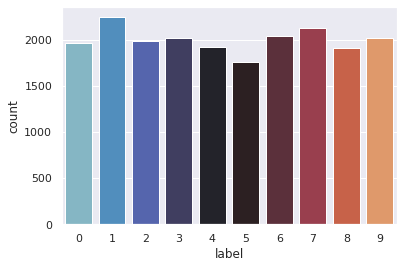

In [ ]:
sns.countplot(data['label'],palette = 'icefire')

# Pixel Value Frequency

Text(0, 0.5, 'Frequency')

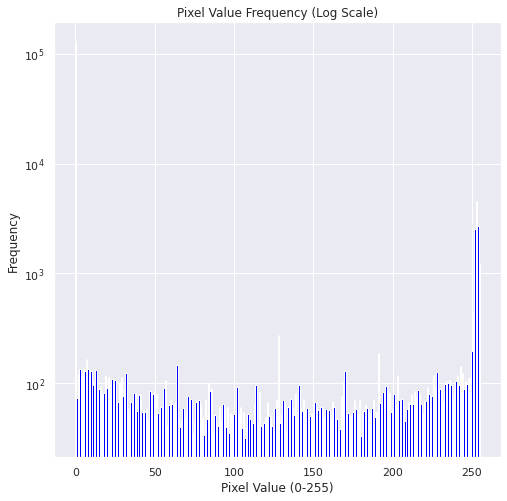

In [ ]:
y = pd.value_counts(data.values[:200].ravel()).sort_index()
N = len(y)
x = range(0,N)
width =0.9
plt.figure(figsize=[8,8])
plt.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

# Feature Selection and Correlation Matix

Feature Selection is the process used to select the input variables that are most important to your Machine Learning task.

A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.


The coeffient used here is  Pearson’s correlation coefficient

Formula:

![img](https://www.statisticshowto.com/wp-content/uploads/2012/10/pearson.gif)

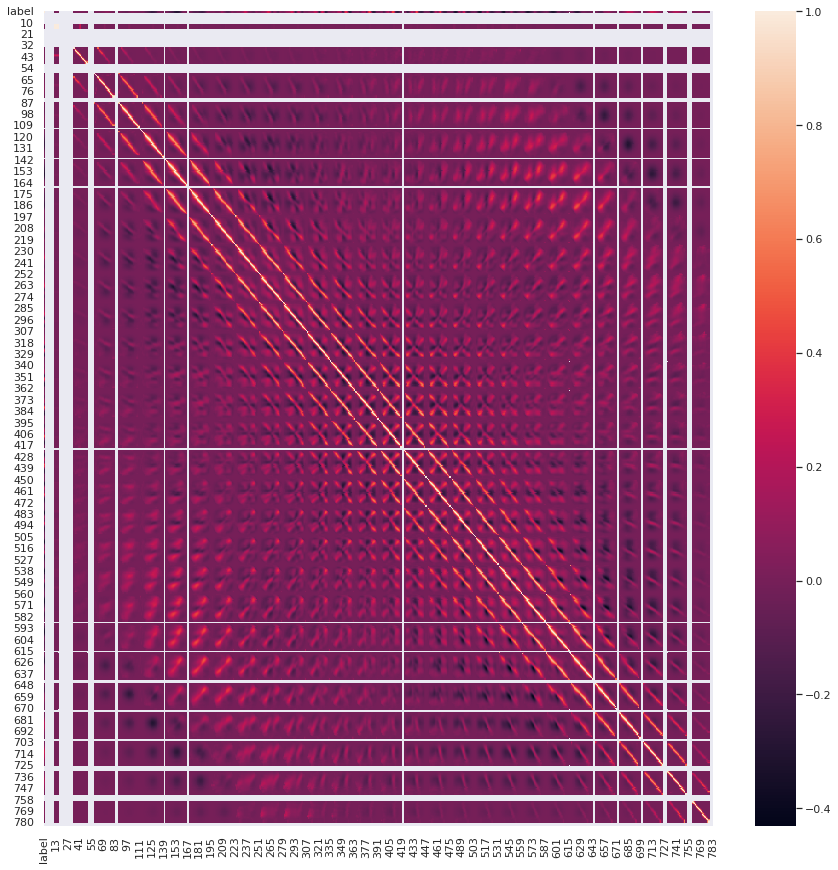

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data=data.corr(),annot=False)

# Average feature values

In [ ]:
pd.set_option('display.max_rows', 999)
round(data.mean(), 2).sort_values(ascending = False)

407      140.04
435      139.83
408      138.08
211      135.66
434      135.60
212      133.80
210      133.35
602      132.67
436      132.63
601      131.28
380      130.19
406      130.18
409      128.78
463      128.46
462      126.94
381      126.90
213      126.82
575      126.81
574      126.24
629      125.15
603      125.15
209      125.03
379      124.50
237      124.34
238      124.13
240      123.86
433      123.35
239      123.35
183      123.20
600      123.12
241      122.72
628      122.23
464      121.89
437      121.86
184      121.45
630      120.13
236      119.21
547      119.09
573      118.65
576      118.23
182      117.72
353      117.56
491      116.52
548      116.38
461      116.18
242      115.65
405      115.64
546      113.97
490      113.60
492      113.42
352      113.27
519      113.08
214      112.87
627      112.56
599      112.54
520      112.21
269      111.86
185      111.74
465      111.70
378      111.59
270      111.14
264      111.03
208     

The mean of input values ranges from 0 to 140, which is a very large range, thus we need to scale the data.

# Data Preprocessing

In [ ]:
X = data.drop("label", axis = 1)
y = data['label']

In [ ]:
X_scaled = scale(X)

In [ ]:
X_scaled[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -7.07142139e-03, -7.07142139e-03, -7.07142139e-03, -7.07142139e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.00545198e-02, -1.43221050e-02,
       -1.67863136e-02, -2.11252639e-02, -2.54962211e-02, -3.21175126e-02,
       -3.54605774e-02, -3.31007114e-02, -3.24483643e-02, -3.28679888e-02,
       -3.07039520e-02, -2.96100380e-02, -2.87172344e-02, -2.12241637e-02,
       -1.21472406e-02, -7.07142139e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

Here the labels are by default integers/floats, but many a times the labels are given as strings/chars, in those cases we have to use label encoder from sklearn to encode the lables to intergers.

![img](https://tinyurl.com/2fyrtat8)

ref : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html


# Train Test Split

![img](https://miro.medium.com/max/1202/1*eFydLxeFcmg8Grn1eKOVXQ.png)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8,test_size = 0.2, random_state = 101)

In [ ]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (15999, 784)
y_train shape: (15999,)
X_test shape: (4000, 784)
y_test shape: (4000,)


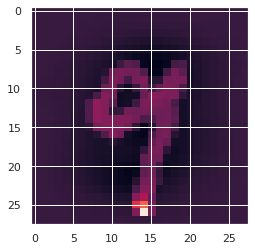

In [ ]:
plt.imshow(X_train[0].reshape(28,28))

In [ ]:
y_train.tolist()[0]

9

# Our ML Model : SVM

SVM (support vector machines)

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

![img](https://miro.medium.com/max/600/0*9jEWNXTAao7phK-5.png) ![img](https://miro.medium.com/max/600/0*0o8xIA4k3gXUDCFU.png)

In [ ]:
model_linear = SVC(kernel='rbf')
model_linear.fit(X_train, y_train)

SVC()

# Validation

![img](https://raw.githubusercontent.com/ieee-ju/storage/main/validation.png)


F1-Score : Harmonic mean of precession and recall

accuracy: 0.9465 



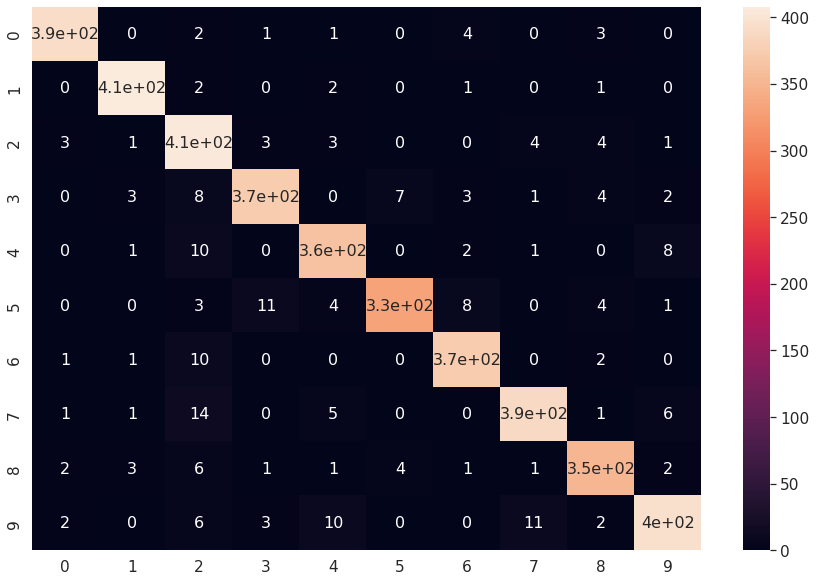

In [ ]:
y_pred = model_linear.predict(X_test)

# confusion matrix and accuracy, precision, recall
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

df_cm = pd.DataFrame(cm, range(10), range(10))
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

In [ ]:
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       404
           1       0.98      0.99      0.98       414
           2       0.87      0.96      0.91       425
           3       0.95      0.93      0.94       402
           4       0.93      0.94      0.94       386
           5       0.97      0.91      0.94       363
           6       0.95      0.96      0.96       387
           7       0.96      0.93      0.94       416
           8       0.94      0.94      0.94       373
           9       0.95      0.92      0.94       430

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000



# One More Attempt to make a better model